In [1]:
#Library

import torch
import numpy as np
from torch.autograd import Variable
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt

In [3]:
#Make a dataset

class CoordinateDataset(Dataset):   
    def __init__(self):
        #Enter the address of data
        csvData=np.loadtxt('./data_spiral.csv',delimiter=',',dtype=np.float32)
        self.len=csvData.shape[0]
        self.X=torch.from_numpy(csvData[:,:2]) #coordinates
        self.Y=torch.from_numpy(csvData[:,-1]).type(torch.LongTensor) #class
        
    def __getitem__(self,index):
        return self.X[index], self.Y[index]
    
    def __len__(self):
        return self.len
    
dataset = CoordinateDataset()
train_loader = DataLoader(dataset = dataset,
                         batch_size=32,
                         shuffle=True,
                         num_workers=0)

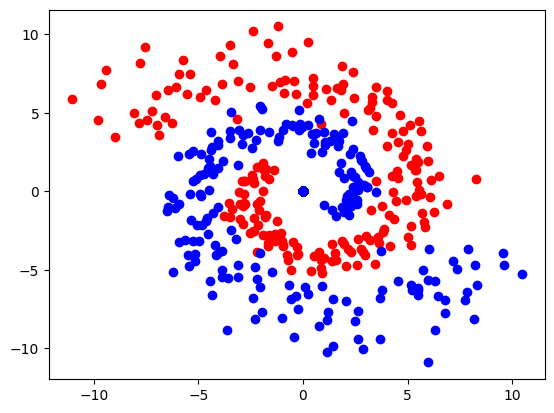

In [4]:
#Display the data
#Not required

#Enter the address of data
data=np.loadtxt('./data_spiral.csv',delimiter=',',dtype=np.float32)

zeroData=np.zeros((400,2))
oneData=np.zeros((400,2))

for i in range(data.shape[0]):
  if (data[i,-1]==0):
    zeroData[i,0]=data[i,0]
    zeroData[i,1]=data[i,1]
  else:
    oneData[i,0]=data[i,0]
    oneData[i,1]=data[i,1]

plt.scatter(zeroData[:,0],zeroData[:,1],c='r')
plt.scatter(oneData[:,0],oneData[:,1],c='b')

In [ ]:
#Make a model

class Net(torch.nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        self.relu = torch.nn.ReLU()
        self.tanh = torch.nn.Tanh()
        self.l1=torch.nn.Linear(2,8) 
        self.l2=torch.nn.Linear(8,8)
        self.l3=torch.nn.Linear(8,2)
 
        
        
    def forward(self,x):
        x = self.l1(x)    #self.relu(self.l1(x))
        x = self.l2(x)    #self.relu(self.l2(x))
        x = self.l3(x)
        return x

model = Net()

In [22]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.005)

# Training loop
print("START EPOCH")
for epoch in range(100):
    #print("EPOCH : {} / 100".format(epoch+1))
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)

        y_pred = model(inputs)

        loss = criterion(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
print("END")

START EPOCH
END


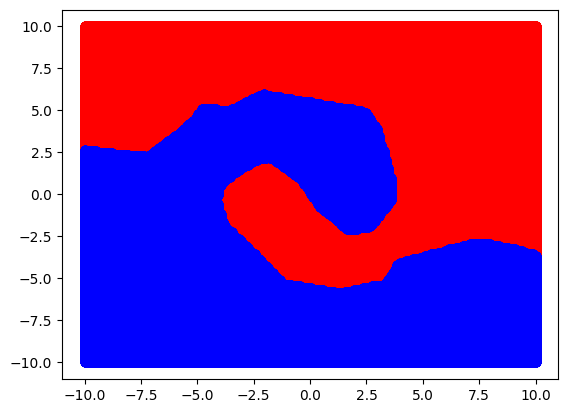

In [23]:
#Make a test set and display results
#Test set consists of 200*200 points

testData = np.zeros((200*200,2))
twoD = np.linspace(-10,10,200)
a=0
for i in range(200):
  for j in range(200):
    testData[a,0]=twoD[j,]
    testData[a,1]=twoD[i,]
    a=a+1
testData = torch.from_numpy(np.float32(testData))

redX = []
redY = []
blueX = []
blueY = []

for i, data in enumerate(train_loader):
        # get the inputs
        inputs, labels = data
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # Forward pass: Compute predicted y by passing x to the model
        testPred = model(testData)
        # Compute and print loss
        v,r = testPred.max(1)
        r = (r.detach().cpu().numpy())
        coor = (testData.detach().cpu().numpy())

        for j in range(len(r)):
          if (r[j]==0):
            redX.append(coor[j][0])
            redY.append(coor[j][1])
          else:
            blueX.append(coor[j][0])
            blueY.append(coor[j][1])

plt.scatter(redX, redY, c='r')
plt.scatter(blueX, blueY, c='b')